<a href="https://colab.research.google.com/github/sol-ops/gpt3-leukemia-information-assistant/blob/main/leukemia_detection_by_mobilenet_for_d5_in_cpu_run_time_best_result_(epoch_10%2Cbatch_size_64_%2Coptimizer_adam%2Caccomplished).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install tensorflow-gpu

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  error: subprocess-exited-with-error
  
  × python setup.py egg_info did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  Preparing metadata (setup.py) ... error
error: metadata-generation-failed

× Encountered error while generating package metadata.
╰─> See above for output.

note: This is an issue with the package mentioned above, not pip.
hint: See above for details.


In [2]:
!nvidia-smi

Thu Apr 20 08:17:06 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 525.85.12    Driver Version: 525.85.12    CUDA Version: 12.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   58C    P8    12W /  70W |      0MiB / 15360MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [3]:
import tensorflow


In [4]:
from tensorflow.keras.layers import Input,Lambda,Dense,Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.applications.mobilenet import MobileNet
from tensorflow.keras.applications.mobilenet import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.models import Sequential
import numpy as np
from glob import glob
import sklearn as sk
import seaborn as sns

In [5]:
IMAGE_SIZE=[224,224]
train_path='/content/drive/MyDrive/Colab Notebooks/data5/train'
vlid_path='/content/drive/MyDrive/Colab Notebooks/data5/validation'

In [6]:
mobilenet=MobileNet(input_shape=IMAGE_SIZE +[3],weights='imagenet',include_top=False)

17225924/17225924 [==============================] - 0s 0us/step


In [7]:
for layer in mobilenet.layers:
  layer.trainable=False

In [8]:
folders=glob('/content/drive/MyDrive/Colab Notebooks/data5/train/*')

In [9]:
folders

['/content/drive/MyDrive/Colab Notebooks/data5/train/normal',
 '/content/drive/MyDrive/Colab Notebooks/data5/train/leukumized']

In [10]:
x=Flatten()(mobilenet.output)

In [11]:
prediction=Dense(len(folders),activation='softmax')(x)

In [12]:
model=Model(inputs=mobilenet.input,outputs=prediction)
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 conv1 (Conv2D)              (None, 112, 112, 32)      864       
                                                                 
 conv1_bn (BatchNormalizatio  (None, 112, 112, 32)     128       
 n)                                                              
                                                                 
 conv1_relu (ReLU)           (None, 112, 112, 32)      0         
                                                                 
 conv_dw_1 (DepthwiseConv2D)  (None, 112, 112, 32)     288       
                                                                 
 conv_dw_1_bn (BatchNormaliz  (None, 112, 112, 32)     128       
 ation)                                                      

In [13]:
model.compile(
loss='categorical_crossentropy',
optimizer='adam',
metrics=['accuracy']
)

In [14]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen=ImageDataGenerator(rescale=1/255,
                                 shear_range=0.2,
                                 zoom_range=0.2,
                                 horizontal_flip=True)

test_datagen=ImageDataGenerator(rescale=1/255)




In [15]:
training_set=train_datagen.flow_from_directory('/content/drive/MyDrive/Colab Notebooks/data5/train',target_size=(224,224),
                                               batch_size=64,
                                               class_mode='categorical')

Found 648 images belonging to 2 classes.


In [16]:
test_set=test_datagen.flow_from_directory('/content/drive/MyDrive/Colab Notebooks/data5/test',
                                          target_size=(224,224),
                                          batch_size=64,
                                          class_mode='categorical')

Found 78 images belonging to 2 classes.


In [17]:
r = model.fit_generator(
    training_set,
    validation_data=test_set,
    epochs=10,
    steps_per_epoch=len(training_set),
    validation_steps=len(test_set)
)

<ipython-input-17-b4b2878d2ea9>:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  r = model.fit_generator(


Epoch 1/10
11/11 [==============================] - 111s 9s/step - loss: 0.7779 - accuracy: 0.8380 - val_loss: 0.3556 - val_accuracy: 0.9487
Epoch 2/10
11/11 [==============================] - 19s 2s/step - loss: 0.4904 - accuracy: 0.9367 - val_loss: 0.1014 - val_accuracy: 0.9744
Epoch 3/10
11/11 [==============================] - 19s 2s/step - loss: 0.1462 - accuracy: 0.9753 - val_loss: 0.0103 - val_accuracy: 1.0000
Epoch 4/10
11/11 [==============================] - 19s 2s/step - loss: 0.0860 - accuracy: 0.9892 - val_loss: 1.8237e-05 - val_accuracy: 1.0000
Epoch 5/10
11/11 [==============================] - 19s 2s/step - loss: 0.1607 - accuracy: 0.9769 - val_loss: 0.0028 - val_accuracy: 1.0000
Epoch 6/10
11/11 [==============================] - 19s 2s/step - loss: 0.0541 - accuracy: 0.9892 - val_loss: 5.5790e-06 - val_accuracy: 1.0000
Epoch 7/10
11/11 [==============================] - 19s 2s/step - loss: 0.0070 - accuracy: 0.9969 - val_loss: 2.4759e-07 - val_accuracy: 1.0000
Epoch 8

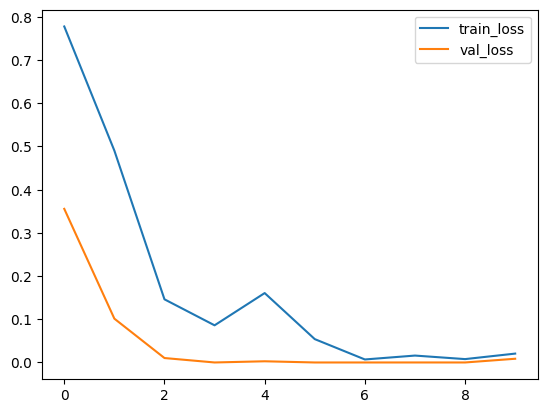

<Figure size 640x480 with 0 Axes>

In [18]:
import matplotlib.pyplot as plt
plt.plot(r.history['loss'],label='train_loss')
plt.plot(r.history['val_loss'],label='val_loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')


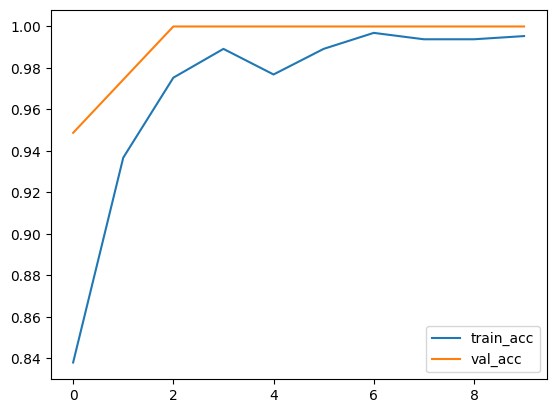

<Figure size 640x480 with 0 Axes>

In [19]:
import matplotlib.pyplot as plt
plt.plot(r.history['accuracy'],label='train_acc')
plt.plot(r.history['val_accuracy'],label='val_acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [ ]:
from sklearn.datasets import data
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score


In [ ]:
# Load dataset
X, y= load data(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.25)
 
# Train the model
tree = DecisionTreeClassifier(random_state=23)
tree.fit(X_train, y_train)
 
# preduction
y_pred = tree.predict(X_test)
 
# compute the confusion matrix
cm = confusion_matrix(y_test,y_pred)
 
#Plot the confusion matrix.
sns.heatmap(cm,
            annot=True,
            fmt='g',
            xticklabels=['leukumized', 'normal'],
             yticklabels=['leukumized', 'normal'])
plt.ylabel('Prediction',fontsize=13)
plt.xlabel('Actual',fontsize=13)
plt.title('Confusion Matrix',fontsize=17)
plt.show()
# Finding precision and recall
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy   :", accuracy)
precision = precision_score(y_test, y_pred)
print("Precision :", precision)
recall = recall_score(y_test, y_pred)
print("Recall    :", recall)
F1_score = f1_score(y_test, y_pred)
print("F1-score  :", F1_score)